In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import seaborn.objects as so
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño
from sklearn.preprocessing import PolynomialFeatures    # Herramientas de polinomios
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
# Esto es para que no me aparezcan los warnings cuando ejecuto los modelos
import warnings
warnings.filterwarnings("ignore")

## Ejercicio 1

#### Queremos estudiar la relacion entre la longitud de la aleta de un pinguino y el peso del pinguino. Como en una esfera, el peso es proporcional a la longitud del radio elevada al cubo, podemos conjeturar que un polinomio de grado 3 es apropiado para ajustar el peso en funci on de la longitud de la aleta. Queremos verificar si nuestra conjetura tiene sustento en los datos

### A) Datos faltantes. Eliminar las filas con datos faltantes del DataFrame de ping ̈uinos y verificar que el DataFrame resultante no contiene valores faltantes

In [2]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Se puede ver que hay. Sino ejecutamos 
``` bash
penguins.isnull ().values.any()
```

In [8]:
print(f"Antes de eliminar los valores nulos: {penguins.shape}")
penguins.dropna(inplace=True)
print(f"Después de eliminar los valores nulos: {penguins.shape}")
print(f"Verifico si hay valores nulos: \n{penguins.isnull().sum()}")

Antes de eliminar los valores nulos: (333, 7)
Después de eliminar los valores nulos: (333, 7)
Verifico si hay valores nulos: 
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


### (B) Conjuntos de entrenamiento y testeo. 
Dividir el dataset resultante en un grupo de
entrenamiento y uno de testeo (80% - 20%). Hacerlo de las siguientes dos formas distintas:

A. Utilizando un array de Numpy para filtrar:

i. Crear un array de Numpy booleano de longitud igual a la cantidad de filas del DataFrame que tome el valor True en el primer 80% de las coordenadas y `False` en el restante 20%.

ii. Si se quiere seleccionar una muestra al azar, se puede utilizar `numpy.random.shuffle` para “mezclar” el vector.
    
iii. Utilizar el vector generado para filtrar el Dataframe.

In [14]:
# i)
train_ind = np.full(penguins.shape[0], False)
train_ind[0:int(len(train_ind) * 0.8)] = True
# ii)
np.random.shuffle(train_ind) # Lo guarda en el mismo vector.
# iii)
penguins_train = penguins[train_ind]
penguins_test = penguins[~train_ind]

B. Utilizando la funcion `train_test_split` de sklearn:

In [15]:
from sklearn.model_selection import train_test_split
penguins_train, penguins_test = train_test_split(penguins, test_size=0.2, random_state=42)

Tambien se puede hacer asi:


In [27]:
X = penguins["flipper_length_mm"] # Columna/s predictoras. En este caso: la longitud de las aletas
y = penguins["body_mass_g"]# Columna/s objetivo. En este caso: el peso del pingüino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### (c) Crear y ajustar 3 modelos utilizando polinomios de grados 1, 2 y 3.

In [28]:
X_train = X_train.values.reshape(-1, 1)

modelo_1 = linear_model.LinearRegression()
modelo_1.fit(X_train, y_train)

modelo_2 = linear_model.LinearRegression()
polynomial_features2= PolynomialFeatures(degree=2, include_bias=False) 
x_poly = polynomial_features2.fit_transform(X_train)
modelo_2.fit(x_poly, y_train)

modelo_3 = linear_model.LinearRegression()
polynomial_features3= PolynomialFeatures(degree=3, include_bias=False)
x_poly = polynomial_features3.fit_transform(X_train)
modelo_3.fit(x_poly, y_train)


LinearRegression()

### (d) Calcular para cada uno el error prediccion en el grupo de entrenamiento y en el grupo de test

In [29]:
X_test = X_test.values.reshape(-1, 1)

In [32]:
print(f"ECM modelo 1, en entrenamiento: {mean_squared_error(y_train, modelo_1.predict(X_train))}")
print(f"ECM modelo 1, en prueba: {mean_squared_error(y_test, modelo_1.predict(X_test))}\n")

print(f"ECM modelo 2, en entrenamiento: {mean_squared_error(y_train, modelo_2.predict(polynomial_features2.fit_transform(X_train)))}")
print(f"ECM modelo 2, en prueba: {mean_squared_error(y_test, modelo_2.predict(polynomial_features2.fit_transform(X_test)))}\n")

print(f"ECM modelo 3, en entrenamiento: {mean_squared_error(y_train, modelo_3.predict(polynomial_features3.fit_transform(X_train)))}")
print(f"ECM modelo 3, en prueba: {mean_squared_error(y_test, modelo_3.predict(polynomial_features3.fit_transform(X_test)))}\n")

ECM modelo 1, en entrenamiento: 159873.09549908544
ECM modelo 1, en prueba: 129886.71972544755

ECM modelo 2, en entrenamiento: 147737.6311072205
ECM modelo 2, en prueba: 127731.22567375602

ECM modelo 3, en entrenamiento: 143995.99465654948
ECM modelo 3, en prueba: 123664.64922778215



## Ejercicio 2



En el archivo `50_startups.csv` tenemos los siguientes datos de 50 compañias: gastos en investigacion y desarrollo, gastos administrativos, gastos en marketing y ganancias. Queremos estimar las ganancias a partir de los gastos en las distintas  ́areas

a) Leer el archivo, y realizar un grafico de dispersion para cada par de variables.

In [3]:
startups = pd.read_csv("../_src/Datasets/50_Startups.csv")
startups.head()

,Investigacion,Administracion,Marketing,Estado,Ganancia
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


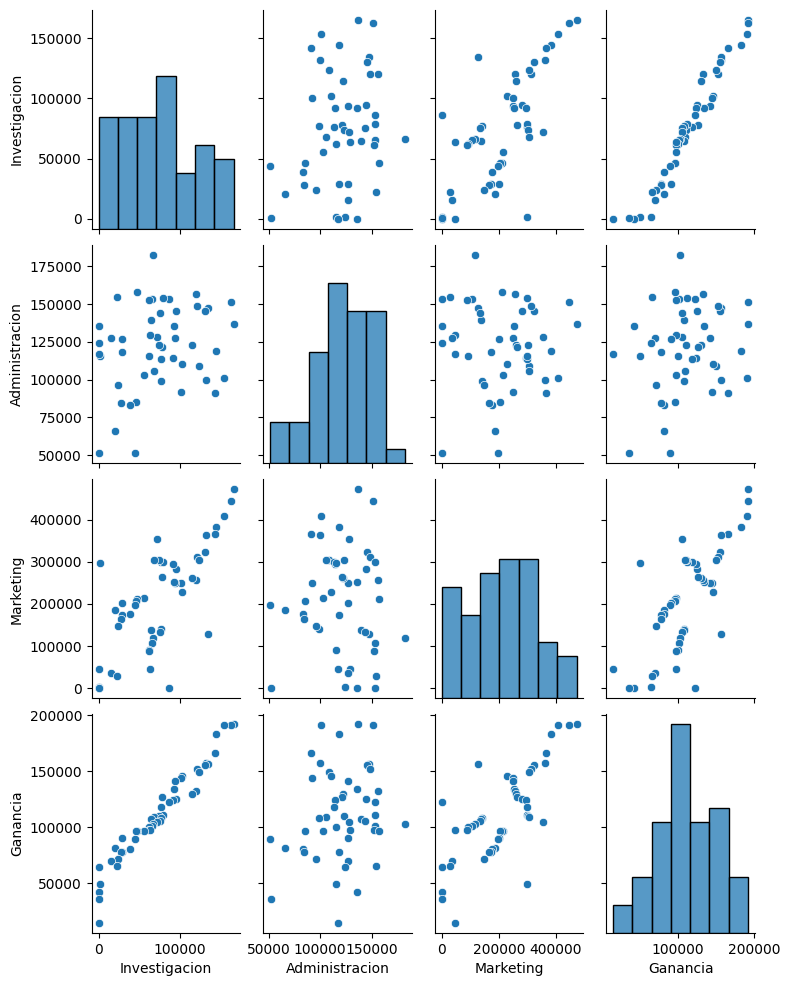

In [5]:
sns.pairplot(data=startups, aspect=.8)
plt.show()

En base a estos gr ́aficos, si quisi ́eramos predecir la ganancia mediante un modelo lineal
utilizando una sola variable predictora, ¿cu ́al variable utilizar ́ıa? Dise ̃nar un experimento
para verificar su respuesta

Si miramos el grafico el que tiene mas relacion lineal son las variables Investigacion y Ganancia. Por lo que usaria esa.

#### item B) 
En este ejemplo, ¿considera que un modelo lineal multivariado ayudar ́ıa a predecir mejor
la ganancia que el modelo lineal univariado del  ́ıtem anterior? Realizar un experimento
para verificar su respuesta

## Ejercicio 3 
En el Ejercicio 1 no tuvimos en cuenta el sexo del ping ̈uino para predecir el peso, y puede
ser una variable importante. Se quiere predecir ahora el peso de un ping ̈uino usando como
variables predictoras el largo de la aleta y el sexo del ping ̈uino (utilizar el DataFrame sin datos
faltantes, como vimos en el Ejercicio 1 (a)

In [10]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [19]:
dummies = pd.get_dummies(penguins["sex"])
penguins = pd.concat([penguins, dummies], axis=1)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Female,Male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0,1


In [25]:
modelo_multivariado = linear_model.LinearRegression()
X = penguins[["flipper_length_mm", "Female","Male"]]
y = penguins["body_mass_g"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_multivariado.fit(X_train, y_train)

print(f"ECM modelo multivariado, en entrenamiento: {mean_squared_error(y_train, modelo_multivariado.predict(X_train))}")
print(f"ECM modelo multivariado, en prueba: {mean_squared_error(y_test, modelo_multivariado.predict(X_test))}\n")

ECM modelo multivariado, en entrenamiento: 132995.78121255696
ECM modelo multivariado, en prueba: 95989.192378319



Otra manera de hacerlo

In [26]:
penguins["sex0"] = penguins["sex"].map({'Female': 0, 'Male': 1})
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Female,Male,sex0
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0,1,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1,0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1,0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1,0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0,1,1


In [29]:
modelo_multivariado2 = linear_model.LinearRegression()
X = penguins[["flipper_length_mm", "sex0"]]
y = penguins["body_mass_g"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_multivariado2.fit(X_train, y_train)

print(f"ECM modelo multivariado2, en entrenamiento: {mean_squared_error(y_train, modelo_multivariado2.predict(X_train))}")
print(f"ECM modelo multivariado2, en prueba: {mean_squared_error(y_test, modelo_multivariado2.predict(X_test))}\n")

ECM modelo multivariado2, en entrenamiento: 132995.78121255685
ECM modelo multivariado2, en prueba: 95989.19237831887



### item a
¿Cuales son todos los valores que toma la variable “sex”? 

¿Que tipo de variable es: numerica o categorica, ordinal o nominal? 

¿Es una variable binaria?

In [ ]:
# Los valores son Female o Male, es una variable categórica nominal, por lo que se puede hacer un one hot encoding
# para convertirlo en una variable numérica. Y al ser solamente 2 es una variable binaria.

### item b
Escribir (en lapiz y papel) la ecuacion de un modelo lineal para este caso. ¿Que unidades tienen las variables y como se codifica la variable “sexo del pinguino”?

### Item c
Codificacion de variables binarias. Para crear una columna con el sexo codificado
como 0 y 1, utilizamos el siguiente codigo

In [39]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder ()
sex01 = encoder.fit_transform(penguins[["sex"]])
penguins["sex01"] = sex01

### item d)
Ajustar el modelo usando todos los datos disponibles. Reportar los coeficientes encontrados y calcular el error de predicci ́on (ECM). ¿Considera que agregar la variable `“sex”` mejor ́o el modelo?

In [10]:
# Cargo el dataset de 0 
penguins = sns.load_dataset("penguins")
penguins.dropna(inplace=True)
encoder = OrdinalEncoder ()
sex01 = encoder.fit_transform(penguins[["sex"]])
penguins["sex01"] = sex01
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex01
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1.0


In [30]:
modelo_multivariado3 = linear_model.LinearRegression()
X = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "sex01"]]
y = penguins["body_mass_g"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_multivariado3.fit(X_train, y_train)

b0 = modelo_multivariado3.intercept_
b1, b2, b3, b4 = modelo_multivariado3.coef_

print(f"ECM modelo multivariado3, en entrenamiento: {mean_squared_error(y_train, modelo_multivariado3.predict(X_train))}")
print(f"ECM modelo multivariado3, en prueba: {mean_squared_error(y_test, modelo_multivariado3.predict(X_test))}")

ECM modelo multivariado3, en entrenamiento: 118551.33636765022
ECM modelo multivariado3, en prueba: 99540.59455135645


#### CONSULTAR

In [38]:
# Hay 3 variables categoricas, las transformo a numericas
sex01 = encoder.fit_transform(penguins[["sex"]])
penguins["sex01"] = sex01

# species01 = encoder.fit_transform(penguins[["species"]])
# penguins["species01"] = species01

# island01 = encoder.fit_transform(penguins[["island"]])
# penguins["island01"] = island01

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex01,species01,island01
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0,0.0,2.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0.0,0.0,2.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0.0,0.0,2.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0.0,0.0,2.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1.0,0.0,2.0


#### CONSULTAR 2

In [8]:
from itertools import combinations

columnas = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "sex01"]

# Generar todas las posibles combinaciones de columnas
todas_combinaciones = []
for i in range(1, len(columnas) + 1):
    combinaciones = combinations(columnas, i)
    todas_combinaciones.extend(combinaciones)

print(todas_combinaciones)

# Convertir las tuplas en listas
todas_combinaciones = [list(comb) for comb in todas_combinaciones]
print(todas_combinaciones)

[('bill_length_mm',), ('bill_depth_mm',), ('flipper_length_mm',), ('sex01',), ('bill_length_mm', 'bill_depth_mm'), ('bill_length_mm', 'flipper_length_mm'), ('bill_length_mm', 'sex01'), ('bill_depth_mm', 'flipper_length_mm'), ('bill_depth_mm', 'sex01'), ('flipper_length_mm', 'sex01'), ('bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'), ('bill_length_mm', 'bill_depth_mm', 'sex01'), ('bill_length_mm', 'flipper_length_mm', 'sex01'), ('bill_depth_mm', 'flipper_length_mm', 'sex01'), ('bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'sex01')]
[['bill_length_mm'], ['bill_depth_mm'], ['flipper_length_mm'], ['sex01'], ['bill_length_mm', 'bill_depth_mm'], ['bill_length_mm', 'flipper_length_mm'], ['bill_length_mm', 'sex01'], ['bill_depth_mm', 'flipper_length_mm'], ['bill_depth_mm', 'sex01'], ['flipper_length_mm', 'sex01'], ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'], ['bill_length_mm', 'bill_depth_mm', 'sex01'], ['bill_length_mm', 'flipper_length_mm', 'sex01'], ['bill_dep

In [11]:
resultados_modelos = []
for combinacion in todas_combinaciones:
    modelo_multivariado = linear_model.LinearRegression()
    X = penguins[combinacion]
    y = penguins["body_mass_g"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    modelo_multivariado.fit(X_train, y_train)
    
    ecm_entrenamiento = mean_squared_error(y_train, modelo_multivariado.predict(X_train))
    ecm_prueba = mean_squared_error(y_test, modelo_multivariado.predict(X_test))
    resultados_modelos.append((combinacion, ecm_entrenamiento, ecm_prueba))


resultados_modelos_ordenados = sorted(resultados_modelos, key=lambda x: x[2])
# Imprimir los resultados ordenados
for resultado in resultados_modelos_ordenados:
    print(f"Columnas: {resultado[0]}")
    print(f"ECM modelo multivariado, en entrenamiento: {resultado[1]}")
    print(f"ECM modelo multivariado, en prueba: {resultado[2]}\n")

Columnas: ['bill_length_mm', 'flipper_length_mm', 'sex01']
ECM modelo multivariado, en entrenamiento: 132488.0488951549
ECM modelo multivariado, en prueba: 95899.37730613146

Columnas: ['flipper_length_mm', 'sex01']
ECM modelo multivariado, en entrenamiento: 132995.78121255685
ECM modelo multivariado, en prueba: 95989.19237831887

Columnas: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'sex01']
ECM modelo multivariado, en entrenamiento: 118551.33636765022
ECM modelo multivariado, en prueba: 99540.59455135645

Columnas: ['bill_depth_mm', 'flipper_length_mm', 'sex01']
ECM modelo multivariado, en entrenamiento: 118567.11058454776
ECM modelo multivariado, en prueba: 99802.95381619094

Columnas: ['bill_depth_mm', 'flipper_length_mm']
ECM modelo multivariado, en entrenamiento: 159453.78959705483
ECM modelo multivariado, en prueba: 127155.49673904809

Columnas: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
ECM modelo multivariado, en entrenamiento: 159235.21723958044
ECM

### Item e
Realizar una visualizacion apropiada para ver de los datos junto con las predicciones del modelo

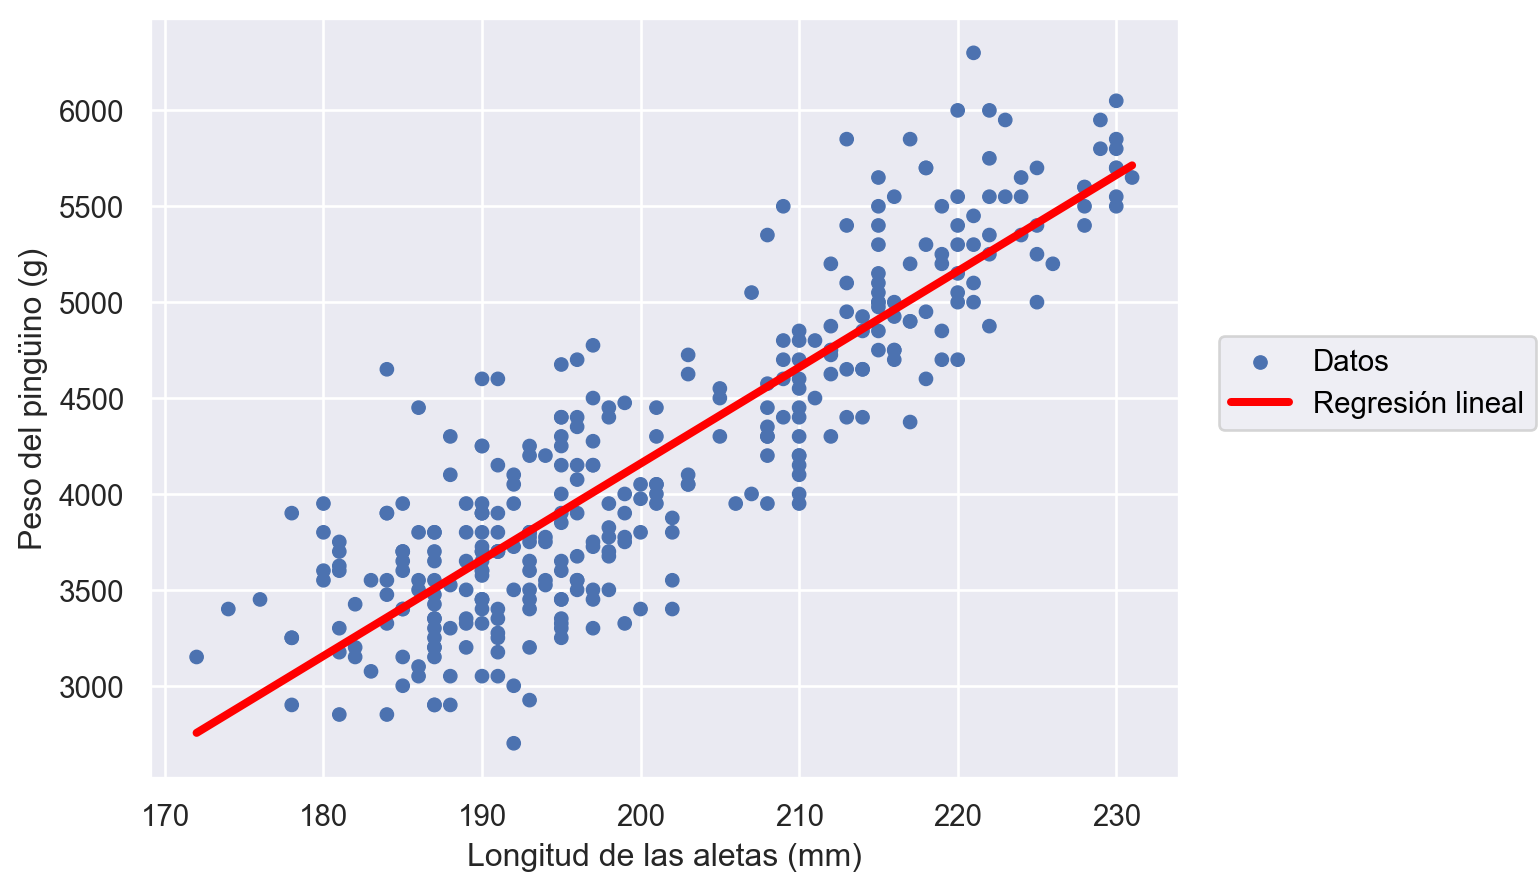

In [31]:
(
    so.Plot(penguins, x="flipper_length_mm", y="body_mass_g")
    .add(so.Dot(pointsize=5), label="Datos")
    .add(so.Line(color="red",linewidth=3),so.PolyFit(1),label="Regresión lineal")
    .label(x="Longitud de las aletas (mm)", y="Peso del pingüino (g)")
)

### Item f
Dos pinguinos que tienen igual largo de aleta, uno macho y otro hembra, ¿que diferencia de peso predice el modelo que tendran?

## Ejercicio 4


Ahora se quiere predecir el peso de un pinguino usando como variables predictoras el largo de
la aleta y la especie del pinguino

### Item a)
Trabajamos con la base de ping ̈uinos sin datos faltantes. ¿Cu ́ales son todos los valores que toma la variable “species”? ¿Qu ́e tipo de variable es: num ́erica o categ ́orica, ordinal o nominal? ¿Es una variable binaria?

In [6]:
# Todos los valores que toma la variable species son:
penguins["species"].unique().tolist()

# Es una variable categorica nominal. No es una variable binaria por que tiene 3 valores posibles.

['Adelie', 'Chinstrap', 'Gentoo']

### Item b

Escribir (en lapiz y papel) la ecuacion de un modelo lineal para este caso. ¿Como se codifica la variable “especie”?


<image src="../_src/images/Ej4bP5.png">

### Item c

Explicar que diferencia tiene este modelo respecto al propuesto en el ejercicio 1

### Item d
Codificacion de variables categoricas. Para agregar variables dummies para cada una de las especies usamos OneHotEncoder

In [39]:
from sklearn . preprocessing import OneHotEncoder
penguins = sns.load_dataset("penguins").dropna()
encoderOHE = OneHotEncoder( sparse_output = False )
species3 = encoderOHE.fit_transform( penguins [["species"]])
species3_df = pd.DataFrame( species3 , columns = encoderOHE.get_feature_names_out() , index = penguins . index)
penguins3 = pd.concat([ penguins , species3_df ] , axis = 1)
penguins3.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0,0.0,0.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0,0.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0,0.0,0.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0,0.0,0.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1.0,0.0,0.0


### item e
Ajustar el modelo usando todos los datos disponibles. Reportar los coeficientes encontrados y calcular el error de prediccion

In [42]:
modelo_multivariado4 = linear_model.LinearRegression()
X = penguins3[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "species_Adelie", "species_Chinstrap", "species_Gentoo"]]
y = penguins3["body_mass_g"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_multivariado4.fit(X_train, y_train)
b0 = modelo_multivariado4.intercept_
b1, b2, b3, b4, b5, b6 = modelo_multivariado4.coef_

print(f"Los coeficientes encontrados son: b0:{b0}, \nb1: {b1}, \nb2: {b2}, \nb3: {b3}, \nb4: {b4}, \nb5: {b5}, \nb6: {b6}")
print(f"ECM modelo multivariado4, en entrenamiento: {mean_squared_error(y_train, modelo_multivariado4.predict(X_train))}")
print(f"ECM modelo multivariado4, en prueba: {mean_squared_error(y_test, modelo_multivariado4.predict(X_test))}")


Los coeficientes encontrados son: b0:-3829.3093900041276, 
b1: 38.13704480160351, 
b2: 146.1137924063356, 
b3: 18.742514675980544, 
b4: -196.5591140368607, 
b5: -657.8744609904757, 
b6: 854.4335750273384
ECM modelo multivariado4, en entrenamiento: 101734.83712225323
ECM modelo multivariado4, en prueba: 80526.32549479954


### Item f
Realizar una visualizacion apropiada para ver de los datos junto con las predicciones del modelo